## Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important

Tingues en compte que prèviament et caldrà preparar el dataset.

In [2]:
pip install --upgrade kneed

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import pandas as pd


In [4]:
data = pd.read_csv(r"C:\\DataScience\\string8\\Publicacions Facebook Thailandia.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [7]:
X=data[['num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]

# Transformación de los datos

### sin procesar

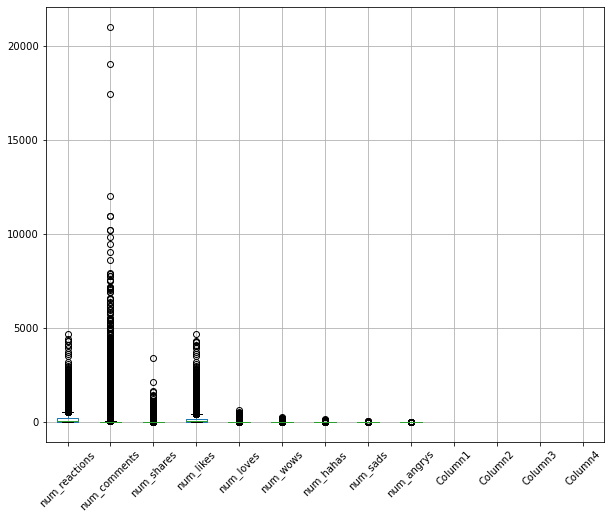

In [8]:
boxplot=data.boxplot(figsize=(10,8))
plt.xticks(rotation=45)

plt.show()

#### RobustScaler

In [10]:
scaler = RobustScaler().fit_transform(X)

In [11]:
scaler[:5]

array([[ 2.32425743, 22.08695652, 65.5       ,  2.2295082 , 30.66666667,
         3.        ,  1.        ,  1.        ,  0.        ],
       [ 0.4480198 , -0.17391304,  0.        ,  0.54843517,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.82920792, 10.08695652, 14.25      ,  0.87034277,  7.        ,
         1.        ,  1.        ,  0.        ,  0.        ],
       [ 0.2549505 , -0.17391304,  0.        ,  0.31594635,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.75990099, -0.17391304,  0.        ,  0.87034277,  3.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [12]:
labels=['num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']

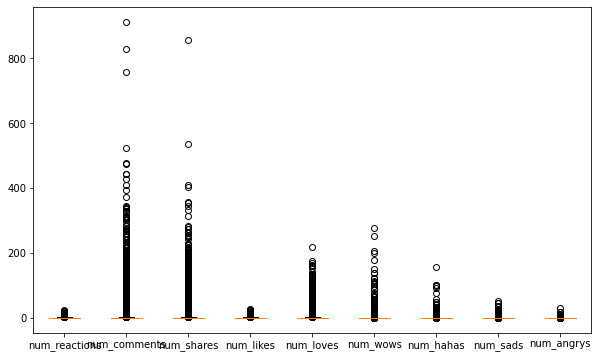

In [13]:
fig, ax = plt.subplots()

ax.boxplot(scaler,labels=labels)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

#### StandarScaler

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scalerS = StandardScaler().fit_transform(X)

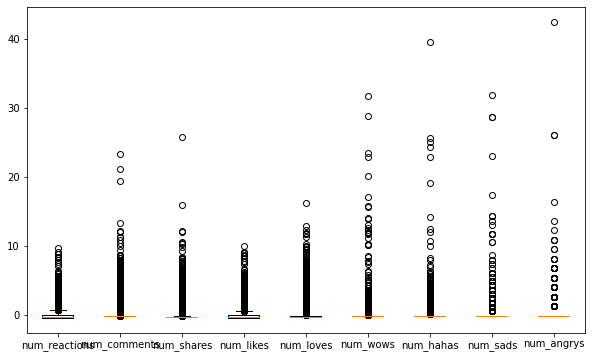

In [16]:
fig, ax = plt.subplots()

ax.boxplot(scalerS,labels=labels)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

#### Normalizer

In [17]:
from sklearn.preprocessing import Normalizer

In [19]:
scalerN = Normalizer().fit_transform(X)

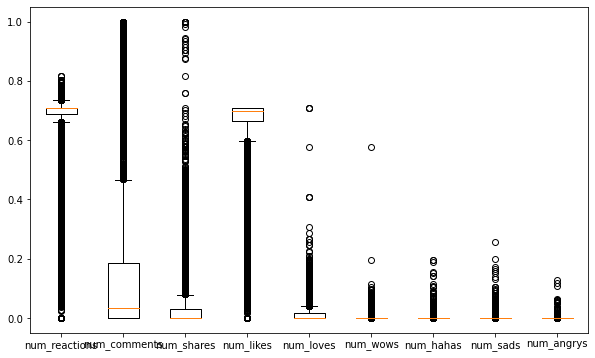

In [20]:
fig, ax = plt.subplots()

ax.boxplot(scalerN,labels=labels)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

He probado tres tipos de transformaciones y creo que el RobustScaler es el mas adecuado en este caso puesto que en realidad los comentarios tienen un peso mas elevado que el resto de caracteristicas 

## K - means con RobustScaler

aqui haga kmeans 1 y kmeans 2 para luego al final poder volver a estos datos al hacer las visualizaciones. es que estaba probando diferentes modos

In [21]:
kmeans1 = KMeans(init="random", n_clusters=3,n_init=10, max_iter=300, random_state=42)

In [22]:
kmeans1.fit(scaler)

KMeans(init='random', n_clusters=3, random_state=42)

In [23]:
# The lowest SSE value
kmeans1.inertia_

6718206.109107058

In [24]:
# Final locations of the centroid
kmeans1.cluster_centers_

array([[2.11231050e+00, 6.89624752e+01, 8.39942946e+01, 1.84222471e+00,
        3.45767635e+01, 8.73443983e+00, 4.92738589e+00, 1.04979253e+00,
        7.11618257e-01],
       [7.24681972e-01, 2.02390468e+00, 2.66062356e+00, 8.47967197e-01,
        1.50264306e+00, 6.29407236e-01, 2.90531178e-01, 1.52270978e-01,
        5.61970747e-02],
       [3.14746372e+00, 2.89845742e+02, 1.74982877e+02, 2.80170671e+00,
        4.77625571e+01, 1.08493151e+01, 8.87671233e+00, 3.05479452e+00,
        1.23287671e+00]])

In [25]:
# The number of iterations required to converge
kmeans1.n_iter_

19

In [27]:
kmeans1.labels_

array([0, 1, 1, ..., 1, 1, 1])

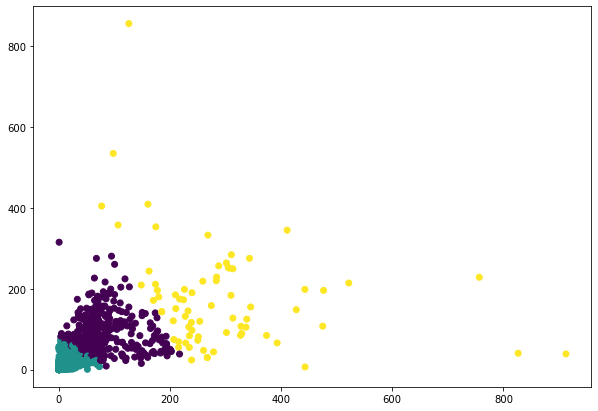

In [28]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaler[:,1:2], scaler[:,2:3],c=kmeans1.labels_)

### Number of Clusters

verificar cuantos cluster debía realmente escoger

In [29]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaler)
    sse.append(kmeans.inertia_)

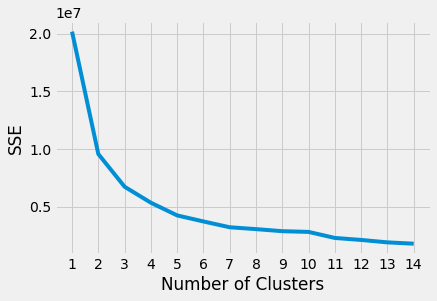

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [31]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")

In [32]:
kl.elbow

3

### silueta coeficiente  - Ejercicio 3 
esta parte constituiría parte del ejercicio 3

In [33]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaler)
    score = silhouette_score(scaler, kmeans.labels_)
    silhouette_coefficients.append(score)

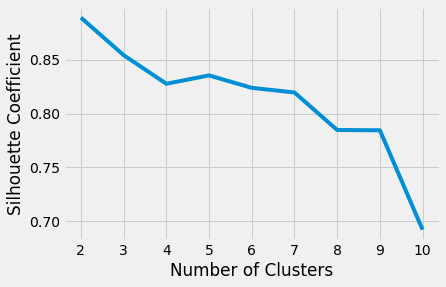

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [35]:
kmeans.labels_

array([4, 1, 6, ..., 1, 1, 1])

In [36]:
scaler[1:2]

array([[ 0.4480198 , -0.17391304,  0.        ,  0.54843517,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

# Exercici 2 - jerarquico

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

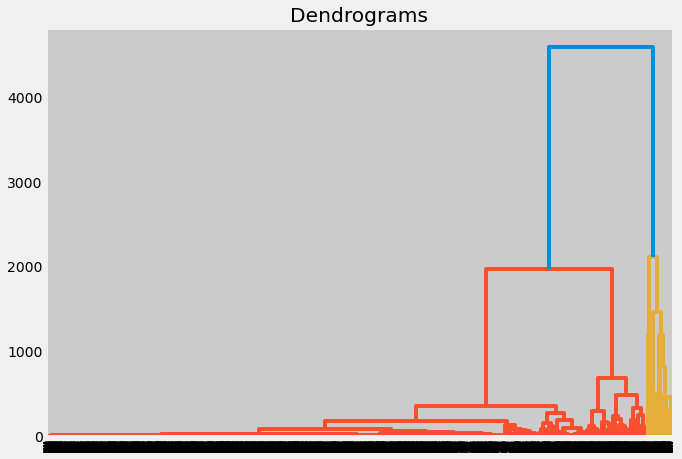

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaler, method='ward'))

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaler)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

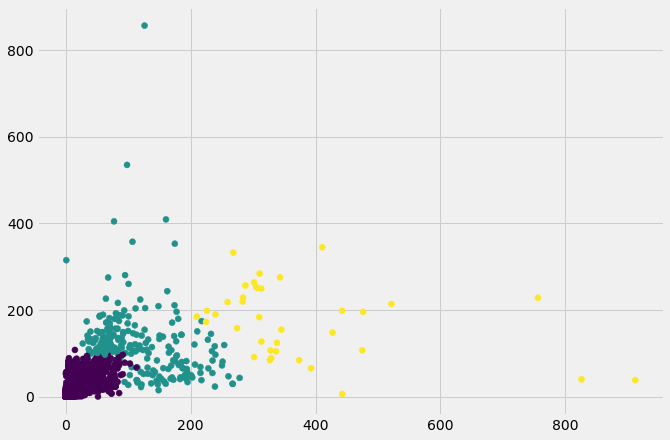

In [39]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaler[:,1:2], scaler[:,2:3], c=cluster.labels_)

## PCA

aqui, he querido probar este metodo para ver que pasa. primero para limpiar el fuido que puede haber  para poder visibilizar los datos reducidos en dos componentes 

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaler)
X_pca = pca.transform(scalerN)
print("original shape:   ", scalerN.shape)
print("transformed shape:", X_pca.shape)

original shape:    (7050, 9)
transformed shape: (7050, 2)


In [41]:
X_pca

array([[-13.76026064,  -2.27031998],
       [-14.39066357,  -2.1274558 ],
       [-13.83366882,  -2.40660521],
       ...,
       [-14.30693688,  -2.01844485],
       [-14.34428558,  -2.11119748],
       [-14.39066357,  -2.1274558 ]])

In [42]:
pca = PCA(.95)
pca.fit(X_pca)
X_pca2 = pca.transform(X_pca)

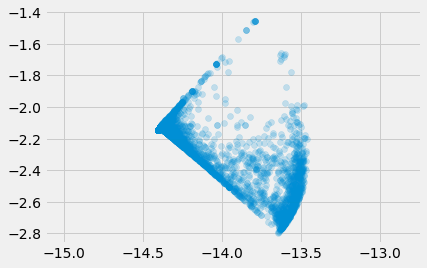

In [43]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)

plt.axis('equal');

In [44]:
kmeans2 = KMeans(init="random", n_clusters=3,n_init=10, max_iter=300, random_state=42)

In [45]:
kmeans2.fit(X_pca2)

KMeans(init='random', n_clusters=3, random_state=42)

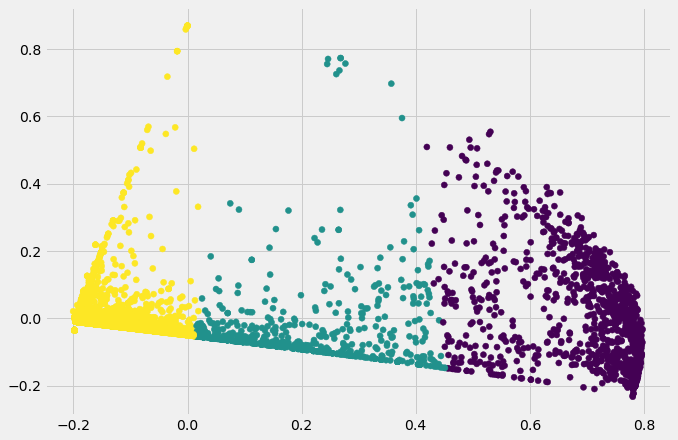

In [46]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_pca2[:,0], X_pca2[:,1],c=kmeans2.labels_)

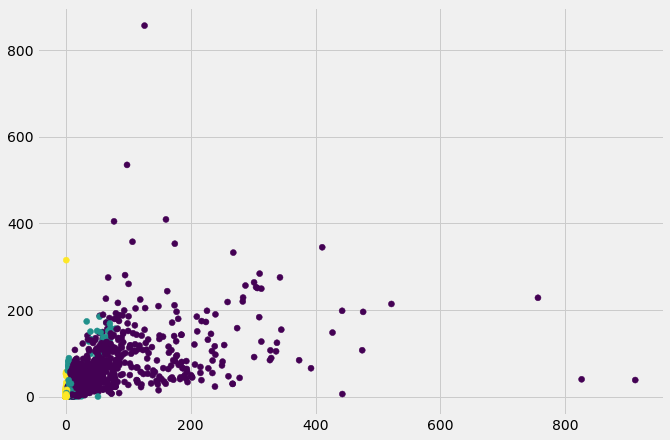

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaler[:,1:2], scaler[:,2:3],c=kmeans2.labels_)

In [51]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca2)
    sse.append(kmeans.inertia_)

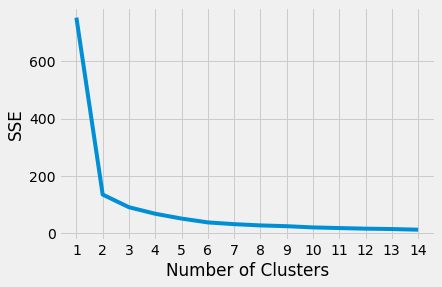

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [53]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
kl.elbow

2

In [54]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca2)
    score = silhouette_score(X_pca2, kmeans.labels_)
    silhouette_coefficients.append(score)

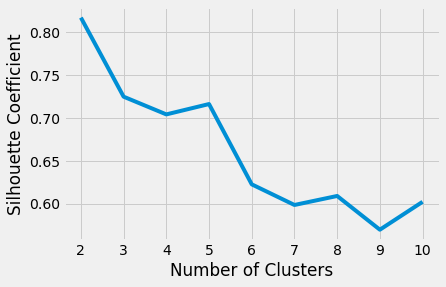

In [55]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Cluster generados por los tres metodos probados 

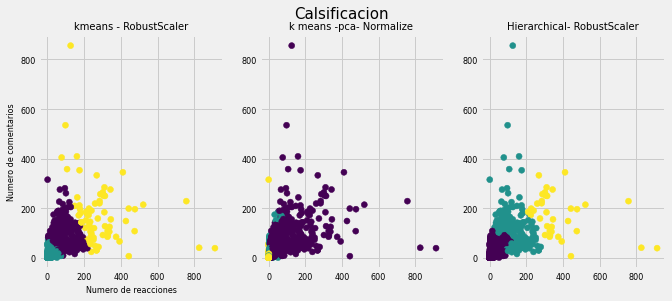

In [57]:
fig, ax = plt.subplots(figsize=(10, 4))

parameters = {'axes.labelsize': 8,
          'axes.titlesize': 10, "figure.titlesize":15,"ytick.labelsize":8, "xtick.labelsize":8 }
plt.rcParams.update(parameters)

#plot 1:
plt.subplot(1, 3, 1)
plt.scatter(scaler[:,1:2], scaler[:,2:3],c=kmeans1.labels_)
plt.xlabel("Numero de reacciones")
plt.ylabel("Numero de comentarios")
plt.title("kmeans - RobustScaler")

#plot 2:

plt.subplot(1, 3, 2)
plt.scatter(scaler[:,1:2], scaler[:,2:3],c=kmeans2.labels_)
plt.title("k means -pca- Normalize ")

#plot 3:

plt.subplot(1, 3, 3)
plt.scatter(scaler[:,1:2], scaler[:,2:3], c=cluster.labels_)
plt.title("Hierarchical- RobustScaler")

plt.suptitle("Calsificacion")
plt.show()